# Polynomial Regression

### Setup

In [109]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [110]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [112]:
np.random.seed(42)
m = 100
X = (np.random.rand(m, 1) * 6) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

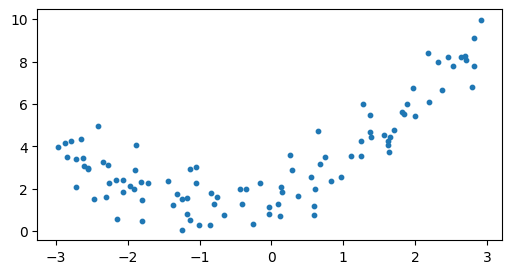

In [113]:
plt.figure(figsize=(6, 3))
plt.scatter(X, y, s=10)
plt.show()

## Polynomial Features

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

#### Perform linear regression with polinomial features

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

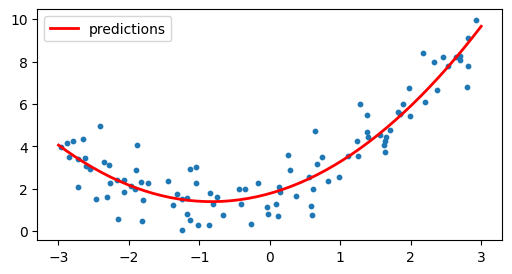

In [116]:
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X, y)

xs = np.linspace(-3, 3).reshape(-1, 1)
ys = poly_reg.predict(xs)

plt.figure(figsize=(6, 3))
plt.scatter(X, y, s=10)
plt.plot(xs, ys, "r",linewidth=2, label="predictions")
plt.legend()
plt.show()

#### Different poly degrees

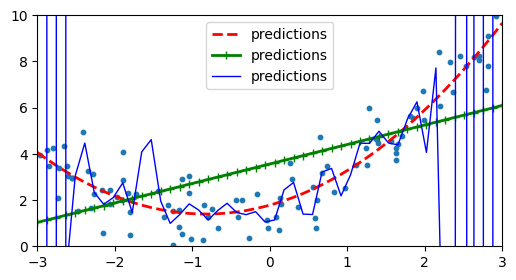

In [122]:
plt.figure(figsize=(6, 3))
plt.scatter(X, y, s=10)

poly_reg.named_steps["poly_features"].degree = 2
poly_reg.fit(X, y)
ys = poly_reg.predict(xs)
plt.plot(xs, ys, "r--",linewidth=2, label="predictions")

poly_reg.named_steps["poly_features"].degree = 1
poly_reg.fit(X, y)
ys = poly_reg.predict(xs)
plt.plot(xs, ys, "g-+",linewidth=2, label="predictions")

poly_reg.named_steps["poly_features"].degree = 300
poly_reg.fit(X, y)
ys = poly_reg.predict(xs)
plt.plot(xs, ys, "b",linewidth=1, label="predictions")

plt.legend()
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

In [125]:
from sklearn.model_selection import learning_curve

train_size, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1, 40), cv=5, scoring="neg_root_mean_squared_error"
)
train_scores[0:5]

array([[-1.06106104, -1.82896912, -1.82896912, -1.82896912, -1.82896912],
       [-1.00107416, -1.85971944, -1.85971944, -1.85971944, -1.85971944],
       [-1.26917493, -1.83279369, -1.83279369, -1.83279369, -1.83279369],
       [-1.21927497, -1.95631798, -1.95631798, -1.95631798, -1.95631798],
       [-1.5448289 , -1.82873013, -1.82873013, -1.82873013, -1.82873013]])